In [ ]:
import pandas as pd
motor=pd.read_csv('/content/Motor_Claims.csv')

In [ ]:
motor.head()

,vehage,CC,Length,Weight,claimamt
0,4,1495,4250,1023,72000.0
1,2,1061,3495,875,72000.0
2,2,1405,3675,980,50400.0
3,7,1298,4090,930,39960.0
4,2,1495,4250,1023,106800.0


In [ ]:
motor.shape

(1000, 5)

Text(0.5, 1.0, 'ScatterPlot Matrix')

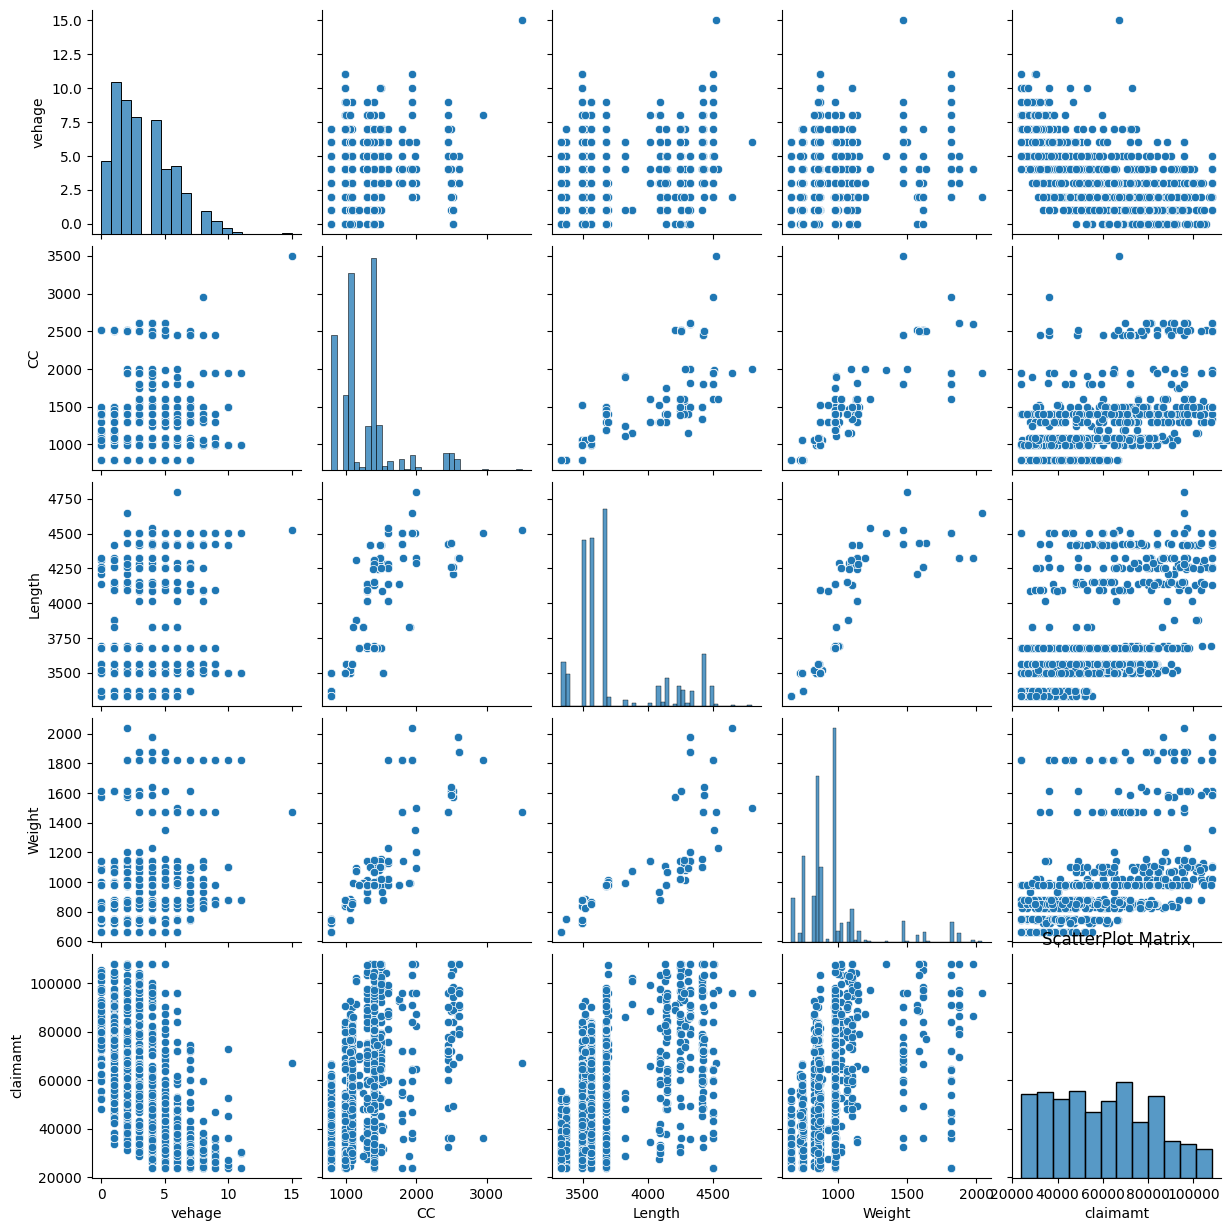

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(motor);plt.title('ScatterPlot Matrix')

In [ ]:
import statsmodels.formula.api as smf
motormodel = smf.ols('claimamt~Length+CC+vehage+Weight', data=motor).fit()


In [ ]:
motormodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               claimamt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     700.3
Date:                Wed, 03 May 2023   Prob (F-statistic):          1.83e-287
Time:                        15:29:00   Log-Likelihood:                -10754.
No. Observations:                1000   AIC:                         2.152e+04
Df Residuals:                     995   BIC:                         2.154e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.477e+04   5569.375     -9.833      0.000   -6.57e+04   -4.38e+04
Length        35.4607      1.990     17.824      0.000      31.557      39.365
CC            15.4133      2.114      7.292      0.000      11.265      19.561
vehage     -6637.2134    154.098    -43.071      0.000   -6939.607   -6334.820
Weight       -16.2547      3.678     -4.420      0.000     -23.472      -9.038
==============================================================================
Omnibus:                        7.335   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                9.587
Skew:                          -0.058   Prob(JB):                      0.00828
Kurtosis:                       3.466   Cond. No.                     6.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(motormodel.tvalues, '\n', motormodel.pvalues)
## all p values <0.05, all the independent variables are significant to the model

Intercept    -9.833262
Length       17.823785
CC            7.291915
vehage      -43.071461
Weight       -4.419639
dtype: float64 
 Intercept     7.706563e-22
Length        6.940458e-62
CC            6.226953e-13
vehage       1.306681e-229
Weight        1.097205e-05
dtype: float64


In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Break into left and right hand side; y and X
y, X = dmatrices('claimamt~Length+CC+vehage+Weight', data=motor, return_type="dataframe")

#Calculating VIF
vif = pd.Series([variance_inflation_factor(X.values, i)for i in range(X.shape[1])],index=X.columns)
vif


Intercept    240.261728
Length         3.396171
CC             5.881428
vehage         1.038357
Weight         6.552811
dtype: float64

In [ ]:
## vif of weight is >5, therefore multicollinearity exists, drop the variable
## create model again without variable weight

In [ ]:
motormodel1 = smf.ols('claimamt~Length+CC+vehage', data=motor).fit()
print(motormodel1.pvalues)

Intercept     1.268511e-18
Length        6.662955e-59
CC            6.023595e-09
vehage       3.800334e-227
dtype: float64


In [ ]:
# Break into left and right hand side; y and X
y, X = dmatrices('claimamt~Length+CC+vehage', data=motor, return_type="dataframe")

#Calculating VIF
vif = pd.Series([variance_inflation_factor(X.values, i)for i in range(X.shape[1])],index=X.columns)
vif


Intercept    227.959103
Length         2.889718
CC             2.833931
vehage         1.038355
dtype: float64

In [ ]:
## all the vif's are <5, therefore multicollinearity does not exist

In [ ]:
motor=motor.assign(res=pd.Series(motormodel1.resid))

from math import sqrt
RMSE = sqrt((motor['res']**2).mean())
RMSE


11444.512861029949

In [ ]:
## HOLD OUT VALIDATION
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
motor=pd.read_csv('/content/Motor_Claims.csv')

motor_train, motor_test = train_test_split(motor, test_size=0.3, random_state=0)


In [ ]:
print(motor_train.shape)
print(motor_test.shape)

(800, 5)
(200, 5)


In [ ]:
motor_model=smf.ols('claimamt~vehage+CC+Length', data = motor_train).fit()

motor_train=motor_train.assign(res=pd.Series(motor_model.resid))
motor_train.head()




,vehage,CC,Length,Weight,claimamt,res
105,2,1405,3675,980,78240.000,10245.141151
68,1,995,3495,840,72881.520,7679.761085
479,2,1405,3675,980,64799.952,-3194.906849
399,1,1405,3675,980,64787.760,-9806.004321
434,2,1405,3675,980,65999.976,-1994.882849


In [ ]:
RMSEtrain=pd.Series(np.sqrt((motor_train.res)**2).mean())
RMSEtrain

0    9098.006796
dtype: float64

In [ ]:
motor_test=motor_test.assign(pred=pd.Series(motor_model.predict(motor_test)))
motor_test=motor_test.assign(res=pd.Series(motor_test.claimamt - motor_test.pred))
motor_test.head()



,vehage,CC,Length,Weight,claimamt,pred,res
993,3,796,3335,665,30240.00,45274.895449,-15034.895449
859,1,1086,3565,854,72791.76,68184.260275,4607.499725
298,5,1343,4420,1100,50400.00,69853.779235,-19453.779235
553,6,1405,3675,980,28800.00,41599.236961,-12799.236961
672,1,1405,3675,980,90960.00,74593.764321,16366.235679


In [ ]:
RMSEtest=pd.Series(np.sqrt((motor_test.res)**2).mean())
RMSEtest

0    8841.900487
dtype: float64

In [ ]:
## K FOLD CROSS VALIDATION
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import linear_model


In [ ]:
##motor=pd.read_csv('Motor_Claims.csv’)

X=motor.drop(['claimamt'], axis = 1)
y=motor.claimamt


In [ ]:
lm_reg = linear_model.LinearRegression()

In [ ]:
cv_r2_scores_lm = cross_val_score(lm_reg, X, y, cv=4,scoring='r2')
print(cv_r2_scores_lm)
##[0.75432031 0.72743804 0.69157553 0.7365273 ]
print("Mean 4-Fold R Squared: {}".format(np.mean(cv_r2_scores_lm)))
## Mean 4-Fold R Squared: 0.7274652945788245


## 11461.73251088066


In [ ]:
cv_rmse_scores= cross_val_score(lm_reg, X, y, cv=4, scoring='neg_mean_squared_error')
np.sqrt(-(np.mean(cv_rmse_scores)))

11461.732510880658

In [ ]:
## REPEATED K FOLD CROSS VALIDATION
from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5,n_repeats=5)

In [ ]:
cv_r2_repeated = cross_val_score(lm_reg, X, y, cv=rkfold)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_repeated)))


cv_rmse_repeated= cross_val_score(lm_reg, X, y, cv=rkfold, scoring='neg_mean_squared_error')
np.sqrt(-(np.mean(cv_rmse_repeated)))

Mean 5-Fold R Squared: 0.7314159243793721


11440.15955762122

In [ ]:
## LOOCV (k=1) 1000, 999 will be used for training and 1 observation will be used for testing